In [3]:
import pandas as pd
ipl_auction_df = pd.read_csv('H:\Courses\Codes-Data-Files\Machine Learning (Codes and Data Files)\Data\IPL IMB381IPL2013.csv')
#importing dataset from the file address

In [4]:
type(ipl_auction_df)

pandas.core.frame.DataFrame

In [6]:
pd.set_option('display.max_columns',7)

In [7]:
ipl_auction_df.head(5)

,Sl.NO.,PLAYER NAME,AGE,...,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,...,2009,50000,50000
1,2,Abdur Razzak,2,...,2008,50000,50000
2,3,"Agarkar, AB",2,...,2008,200000,350000
3,4,"Ashwin, R",1,...,2011,100000,850000
4,5,"Badrinath, S",2,...,2011,100000,800000


# Players analysis
1. Percentage of Players from each country
2. Count of players player_role wise and age group :
    Category 1 - Player is less than 25 years old
    Category 2 - Age between 25 and 35
    Category 3 - Age is more than 35 
3. Sort players in descending order by their sold price
4. Sort players in descending order by their premium (i.e. Sold price - Base price)
5. Find avg sold price for each age and playing role category
6. Filter out players who have hit more than 80 sixers in IPL tournament
7. Compare the avg Sold price for different age with different playing role & age categories
8. Find min, max, Median and IQR values of Sold price
9. Compare sold price for different playing roles and age
10. Plot relationship bw batsman sold price, Average, Strike rate and sixers hit

In [13]:
ipl_auction_df.COUNTRY.value_counts()

IND    53
AUS    22
SA     16
SL     12
PAK     9
NZ      7
WI      6
ENG     3
BAN     1
ZIM     1
Name: COUNTRY, dtype: int64

In [23]:
ipl_auction_df.COUNTRY.value_counts(normalize=True)*100 
#1 gives percentage of players from each country

IND    40.769231
AUS    16.923077
SA     12.307692
SL      9.230769
PAK     6.923077
NZ      5.384615
WI      4.615385
ENG     2.307692
BAN     0.769231
ZIM     0.769231
Name: COUNTRY, dtype: float64

In [15]:
pd.crosstab(ipl_auction_df['AGE'],ipl_auction_df['PLAYING ROLE']) #2 

PLAYING ROLE,Allrounder,Batsman,Bowler,W. Keeper
AGE,,,,
1,4,5,7,0
2,25,21,29,11
3,6,13,8,1


In [16]:
ipl_auction_df[['PLAYER NAME','SOLD PRICE']].sort_values('SOLD PRICE',ascending=False) #3

,PLAYER NAME,SOLD PRICE
93,"Sehwag, V",1800000
127,Yuvraj Singh,1800000
50,"Kohli, V",1800000
111,"Tendulkar, SR",1800000
113,"Tiwary, SS",1600000
...,...,...
34,"Henriques, MC",50000
5,"Bailey, GJ",50000
0,"Abdulla, YA",50000
46,Kamran Khan,24000


In [18]:
ipl_auction_df['premium'] = ipl_auction_df['SOLD PRICE'] - ipl_auction_df['BASE PRICE']
#4 Creating new column as premium

In [20]:
ipl_auction_df[['PLAYER NAME','BASE PRICE','SOLD PRICE','premium']].sort_values('premium',ascending=False)
#Sorting players by their premium

,PLAYER NAME,BASE PRICE,SOLD PRICE,premium
50,"Kohli, V",150000,1800000,1650000
113,"Tiwary, SS",100000,1600000,1500000
127,Yuvraj Singh,400000,1800000,1400000
111,"Tendulkar, SR",400000,1800000,1400000
93,"Sehwag, V",400000,1800000,1400000
...,...,...,...,...
102,"Smith, DR",100000,100000,0
73,"Noffke, AA",20000,20000,0
100,"Silva, LPC",100000,100000,0
74,"Ntini, M",200000,200000,0


In [32]:
soldprice_by_age_role=ipl_auction_df.groupby(['AGE','PLAYING ROLE'])['SOLD PRICE'].mean().reset_index()
print(soldprice_by_age_role)
#5 Mean returns a pd.Series data structure, reset_index() returns a dataframe

    AGE PLAYING ROLE    SOLD PRICE
0     1   Allrounder  5.875000e+05
1     1      Batsman  1.110000e+06
2     1       Bowler  5.177143e+05
3     2   Allrounder  4.494000e+05
4     2      Batsman  6.547619e+05
5     2       Bowler  3.979310e+05
6     2    W. Keeper  4.677273e+05
7     3   Allrounder  7.666667e+05
8     3      Batsman  4.576923e+05
9     3       Bowler  4.143750e+05
10    3    W. Keeper  7.000000e+05


In [24]:
ipl_auction_df[ipl_auction_df['SIXERS']>80][['PLAYER NAME','SIXERS']] #6

,PLAYER NAME,SIXERS
26,"Gayle, CH",129
28,"Gilchrist, AC",86
82,"Pathan, YK",81
88,"Raina, SK",97
97,"Sharma, RG",82


In [33]:
soldprice_by_age = ipl_auction_df.groupby('AGE')['SOLD PRICE'].mean().reset_index()
soldprice_comparison = soldprice_by_age_role.merge( soldprice_by_age,on = 'AGE',how = 'outer')
#7 Compare avg Sold price for different Age with different role and age categories

In [34]:
soldprice_comparison.rename( columns = { 'SOLD PRICE_x': 'SOLD_PRICE_AGE_ROLE',
'SOLD PRICE_y': 'SOLD_PRICE_AGE' }, inplace = True )

In [37]:
soldprice_comparison['change'] = soldprice_comparison.apply(lambda rec:(rec.SOLD_PRICE_AGE_ROLE - rec.SOLD_PRICE_AGE) / rec.SOLD_PRICE_AGE,axis = 1)
soldprice_comparison

,AGE,PLAYING ROLE,SOLD_PRICE_AGE_ROLE,SOLD_PRICE_AGE,change
0,1,Allrounder,5.875000e+05,720250.000000,-0.184311
1,1,Batsman,1.110000e+06,720250.000000,0.541132
2,1,Bowler,5.177143e+05,720250.000000,-0.281202
3,2,Allrounder,4.494000e+05,484534.883721,-0.072513
4,2,Batsman,6.547619e+05,484534.883721,0.351320
5,2,Bowler,3.979310e+05,484534.883721,-0.178736
6,2,W. Keeper,4.677273e+05,484534.883721,-0.034688
7,3,Allrounder,7.666667e+05,520178.571429,0.473853
8,3,Batsman,4.576923e+05,520178.571429,-0.120125
9,3,Bowler,4.143750e+05,520178.571429,-0.203399


In [25]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

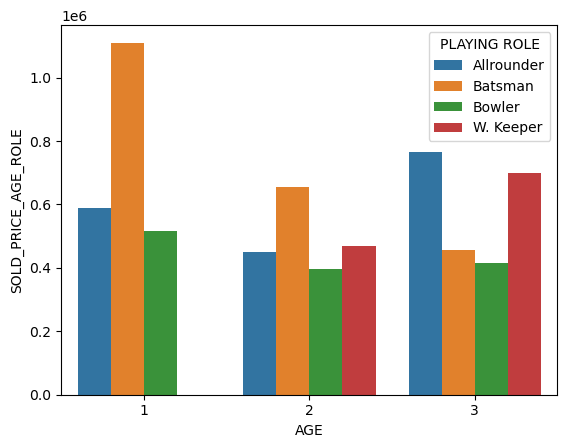

In [38]:
sn.barplot(x = 'AGE', y = 'SOLD_PRICE_AGE_ROLE', hue = 'PLAYING ROLE', data = soldprice_comparison);
#In age categories 1 and 2 Batsman are paid maximum, whereas allrounders are paid max in age category 3
#This could be because allrounders establish their credentials over a period

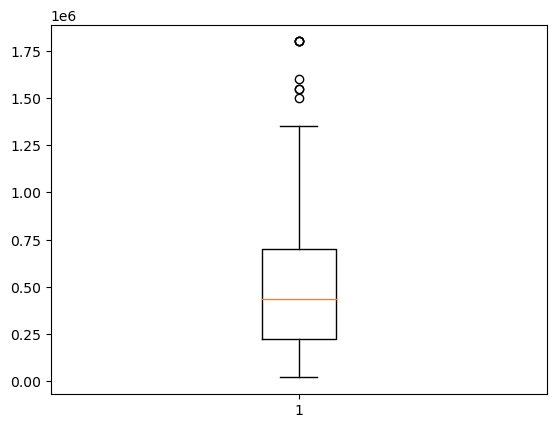

In [39]:
box = plt.boxplot(ipl_auction_df['SOLD PRICE']); #8

In [40]:
[item.get_ydata()[0] for item in box['caps']]
# Minimum auction price is 20,000; Max is 13,50,000
# But there are outliers also (i.e. Max will be > 13,50,000)

[20000, 1350000]

In [41]:
[item.get_ydata()[0] for item in box['whiskers']]
# Sold price at 1st quartile is 2,25,000; at 3rd quartile is 7,00,000
# IQR = 4,75,000

[225000.0, 700000.0]

In [42]:
[item.get_ydata()[0] for item in box['medians']]

[437500.0]

In [45]:
ipl_auction_df[ipl_auction_df['SOLD PRICE'] > 1350000.0][['PLAYER NAME','PLAYING ROLE','SOLD PRICE']].sort_values('SOLD PRICE',ascending=False)
# Max sold price is 18,00,000

,PLAYER NAME,PLAYING ROLE,SOLD PRICE
50,"Kohli, V",Batsman,1800000
93,"Sehwag, V",Batsman,1800000
111,"Tendulkar, SR",Batsman,1800000
127,Yuvraj Singh,Batsman,1800000
113,"Tiwary, SS",Batsman,1600000
23,"Flintoff, A",Allrounder,1550000
83,"Pietersen, KP",Batsman,1550000
15,"Dhoni, MS",W. Keeper,1500000


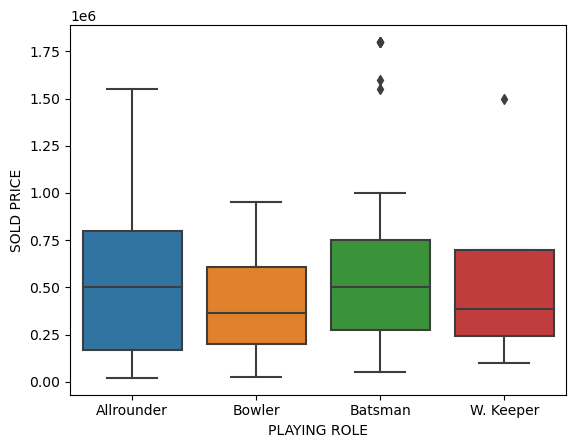

In [46]:
sn.boxplot(x = 'PLAYING ROLE', y = 'SOLD PRICE', data = ipl_auction_df); #9th
#Observations :
# Median sold price for Allrounders and Batsman are higher than Bowler & Wkt keeper
# Allrounders paid more than 13,50,000 are not considered outliers, Allrounders have relatively high variance

In [47]:
ipl_batsman_df = ipl_auction_df[ipl_auction_df['PLAYING ROLE'] == 'Batsman']

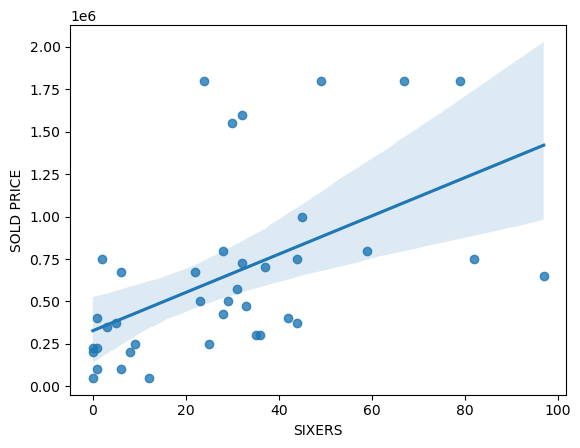

In [48]:
sn.regplot( x = 'SIXERS',y = 'SOLD PRICE',data = ipl_batsman_df );
#10th There is positive correlation bw num of sixes hit and the sold price

In [49]:
influential_features = ['SR-B', 'AVE', 'SIXERS', 'SOLD PRICE']

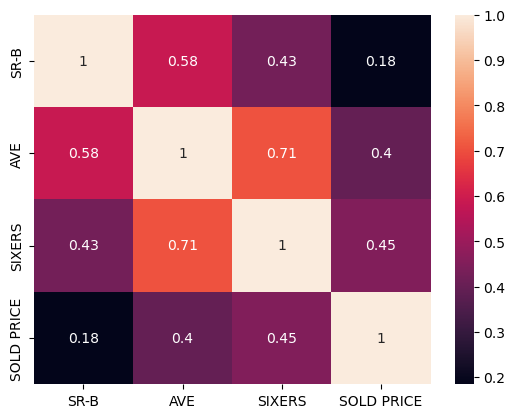

In [50]:
sn.heatmap(ipl_auction_df[influential_features].corr(), annot=True);
# Heatmap shows that Average & Sixers show positive correlation with sold price, Strike rate is not so strongly correlated.